## Задание №1

Загрузите датасет titanic.csv и найдите ответы на вопросы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv', index_col = 0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Описание признаков данных:

Survived - спасение (0 = нет, 1 = да)

Pclass - класс билета (1 = 1st, 2 = 2nd, 3 = 3rd)

Name - имя

Sex - пол

Age - возраст

SibSp - количество братьев/сестер/супругов пассажира на борту

Parch - количество детей/родителей пассажира на борту

Ticket - номер билета

Fare - стоимость билета

Cabin - номер каюты

Embarked - порт посадки

1) Какое количество мужчин и женщин ехало на корабле?

In [48]:
print(data.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64


Ответ: 

Sex
female    314
male      577
dtype: int64


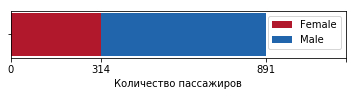

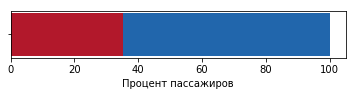

In [96]:
#data.loc[ data.Sex == 'male', ['Sex']].plot(kind = "barh")

pclass = data.groupby(['Sex']).size()
print (pclass)

red, blue = '#B2182B', '#2166AC'

#как написать на самих столбцах..
plt.subplot(411)
plt.barh([0], pclass[0], height = 0.5, color = red, label = 'Female')
plt.barh([0], pclass[1], height = 0.5, color = blue, left = pclass[0], label = 'Male')
plt.xticks([0, pclass[0], pclass[0] + pclass[1], 1170], [0, pclass[0], pclass[0]  + pclass[1], ''], rotation='horizontal')
plt.yticks([0.0], [''])
plt.ylabel("")
plt.xlabel("Количество пассажиров")
plt.legend(loc='best')
plt.show()

total = data["Sex"].size;
#print (total)
plt.subplot(412)
first = pclass[0] / total * 100
second = pclass[1] / total * 100
plt.barh([0], first, height = 0.5, color = red, label = 'Female')
plt.barh([0], second, height = 0.5, color = blue, left = first, label = 'Male')
plt.yticks([0.0], [''])
plt.ylabel("")
plt.xlabel("Процент пассажиров")
plt.show()

2) Какой части пассажиров удалось выжить? Ответ приведите в процентах.

In [7]:
data.loc[data.Survived == 1, ['Survived']].count() / data['Survived'].count() * 100

Survived    38.383838
dtype: float64

Ответ:

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


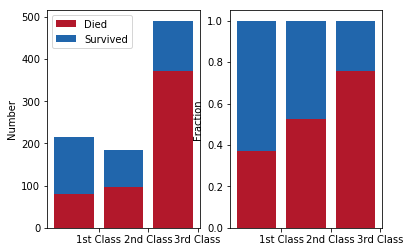

In [26]:
#Пример из Гарвардского курса
tclass = data.groupby(['Pclass', 'Survived']).size().unstack()
print (tclass)
red, blue = '#B2182B', '#2166AC'

plt.subplot(121)
plt.bar([0, 1, 2], tclass[0], color=red, label='Died')
plt.bar([0, 1, 2], tclass[1], bottom=tclass[0], color=blue, label='Survived')
plt.xticks([0.5, 1.5, 2.5], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Number")
plt.xlabel("")
plt.legend(loc='upper left')
#remove_border()

#normalize each row by transposing, normalizing each column, and un-transposing
tclass = (1. * tclass.T / tclass.T.sum()).T

plt.subplot(122)
plt.bar([0, 1, 2], tclass[0], color=red, label='Died')
plt.bar([0, 1, 2], tclass[1], bottom=tclass[0], color=blue, label='Survived')
plt.xticks([0.5, 1.5, 2.5], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Fraction")
plt.xlabel("")
#remove_border()

plt.show()

3) Какую долю пассажиры первого класса составляли среди всех пассажиров? Ответ приведите в процентах.

In [126]:
all_class = data.count().get_value('Pclass')
first_class = data['Pclass'].value_counts().get_value(1)

print(first_class / all_class * 100)

24.2424242424


Ответ:

Pclass
1    216
2    184
3    491
dtype: int64


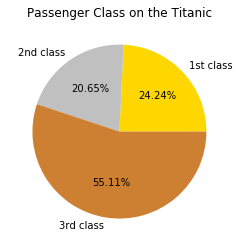

In [117]:
t = data.groupby(['Pclass']).size()
print (t)
colors = ['#C0FFEE', '#DEADBE', '#EFCEED']
colorsPremium = ['#FFD700', '#C0C0C0', '#CD7F32']
plt.subplot(aspect=True)
plt.pie(t, labels = ['1st class', '2nd class', '3rd class'], colors = colorsPremium, autopct='%.2f%%')
plt.title("Passenger Class on the Titanic")
plt.show()

4) Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.

In [124]:
mean = str(data['Age'].mean())
median = str(data['Age'].median())

print("Mean: " + mean + "\nMedian: " + median)

Mean: 29.69911764705882
Median: 28.0


Ответ:

5) Постройте гистограмму возрастов пассажиров.

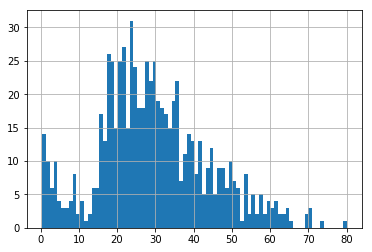

In [9]:
plt.figure()
max_age = int(data["Age"].max())
data["Age"].hist(bins = max_age)
plt.show()

6) Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch

In [24]:
data[["SibSp", "Parch"]].corr(method = 'pearson')
# data.SibSp.corr(data.Parch)

0.41483769862015613

Ответ:

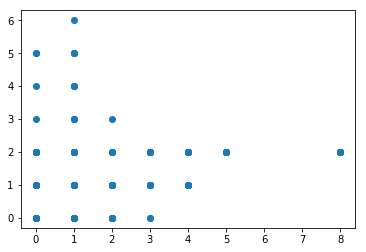

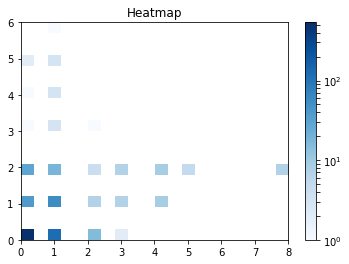

In [158]:
x = data["SibSp"]
y = data["Parch"]
plt.plot(x, y, 'o')
#plt.hexbin(x, y)
plt.show()

from matplotlib.colors import LogNorm

plt.hist2d(x, y, bins=20, cmap='Blues', norm=LogNorm())
ax = plt.gca()
plt.title("Heatmap")
plt.colorbar()
plt.show()

7) Какое самое популярное женское имя на корабле?

In [5]:
female_names = data[data.Sex == 'female']['Name']
female = []

for full_name in female_names:
  if '(' in full_name:
    for name in full_name.split('(')[1].replace(')','').split(' '):
        if '\"' not in name:
          female.append(name)
  else:
    for name in full_name.split('. ')[1].split(' '):
        if '\"' not in name:
          female.append(name)
    
#female
print (data.from_dict(female)[0].value_counts()[:1])

Mary    18
Name: 0, dtype: int64


Ответ: